In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance_binary = pd.get_dummies(insurance)

X = insurance_binary.drop("charges", axis=1)
y = insurance_binary["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.02, random_state=20)

insurance_model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(75),
    tf.keras.layers.Dense(1)
])

insurance_model_01.compile(loss= tf.keras.losses.mae,
                           optimizer= tf.keras.optimizers.Adam(),
                           metrics = ["mae"])

history = insurance_model_01.fit(X, y, epochs=200)

history

Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 13023.8008 - mae: 13023.8008
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12299.7656 - mae: 12299.7656
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10055.4805 - mae: 10055.4805
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7625.8228 - mae: 7625.8228
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7318.7441 - mae: 7318.7441
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7608.8110 - mae: 7608.8110
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7219.7510 - mae: 7219.7510
Epoch 8/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7466.3594 - mae: 7466.3594
Epoch 9/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7335.5054 - mae: 7335.5054
Epoch 10/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6925.5122 - mae: 6925.5122
Epoch 11/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7595.3418 - mae: 7595.3418
Epoch 12/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [2]:
insurance_model_01.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 3983.4485 - mae: 3983.4485


[3983.448486328125, 3983.448486328125]

Text(0.5, 0, 'epochs')

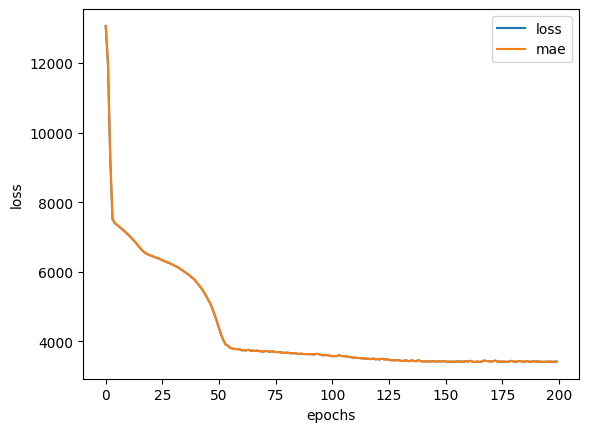

In [3]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [4]:
import os

os.makedirs('Practice_models', exist_ok=True)
insurance_model_01.save('Practice_models/insurance_model_01.keras')

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region'])
)

X = insurance.drop("charges", axis =1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [7]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [8]:
X_train_normal[0]

array([0.02173913, 0.52649987, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [9]:
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.Adam(),
                               metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs =100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13344.4219 - mae: 13344.4219
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12970.1943 - mae: 12970.1943
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13194.0430 - mae: 13194.0430
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12859.5225 - mae: 12859.5225
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13170.6523 - mae: 13170.6523
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12433.6855 - mae: 12433.6855
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11228.2432 - mae: 11228.2432
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10386.2402 - mae: 10386.2402
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9991.8193 - mae: 9991.8193  
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8922.3438 - mae: 8922.3438
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8595.1680 - mae: 8595.1680
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━

In [10]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3835.3259 - mae: 3835.3259  


[3864.421630859375, 3864.421630859375]

In [11]:
!git config --global user.email "attaabmanzil@gmail.com"
!git config --global user.name "AttaabManzil"


In [13]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:

%cd /content/classification-model-practice/


!cp "/content/drive/MyDrive/Colab Notebooks/Medical_Data.ipynb" .

!git add Medical_Data.ipynb

!git commit -m "Add Medical_Data notebook"

from getpass import getpass
token = getpass("Enter your GitHub Personal Access Token: ")
remote = f"https://{token}@github.com/AttaabManzil/classification-model-practice.git"
!git push {remote} main


[Errno 2] No such file or directory: '/content/classification-model-practice/'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
Enter your GitHub Personal Access Token: ··········
fatal: not a git repository (or any of the parent directories): .git
